# Exceptions and File I/O (Read a file using Scanner+write output file using PrintWriter)

Definition of Exception:
- An exception represents an error that occurs at **runtime**. It's short for **"exceptional event"**.  In this case, the event is a disruption of the normal flow of execution.

Common Java Exceptions:
- NullPointerException
- ArrayIndexOutOfBoundsException
- StringIndexOutOfBoundsException
- ArithmeticException
- ClassCastException
- IllegalArgumentException
- InputMismatchException

## 1. Call Stack (Trace)

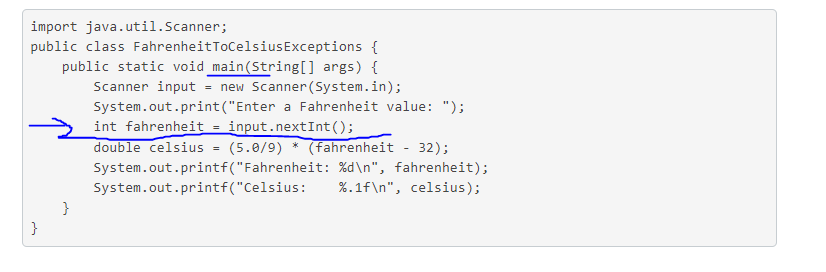
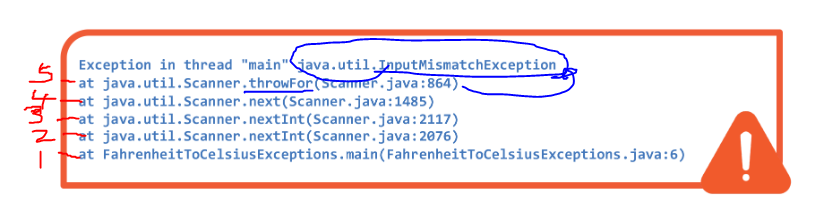

- In handling exceptions, the order of method calls for the above exceptions error message is from bottom to up, i.e. 1,2,3,4,5 order indicated in the screenshot above.

- In the above example, we provided a system input to Scanner called "thirty". In this case, .nextInt() will throw an error because it only accepts integer.

- As expected and shown is the error message screenshot, execution started with the **main** method, which then called Scanner's **nextInt** method. That particular nextInt call invoked an overloaded version of nextInt in Scanner.  For this discussion, you don’t need to worry about the details of that overloaded version beside the fact that it made a call to the **next method**.  **It is in this method where the "thirty" is actually read and identified as an unexpected type.** As a result, the next method called the **throwFor** method, which  then created an instance of an **InputMismatchException** object. The object was then handed off to the JVM using a Java operator called "throw". 

**Definition**:

**call stack trace**
- This list together with the bottom up order of reading it is called a **call stack trace** or just **stack trace** for short. The word "trace" is used because the list is an indication of the sequence of method calls that led up to an exception being thrown. "Stack" also applies here as it represents how method calls are internally managed by the JVM, particularly when methods are being called from one another. 

**Stack**:
1. the JVM stacks chunks of data or records about methods on top of one another. The bottom being main and the top being the most recently called method. Remember that main is always the first method called, which indicates the start of the program.
- the JVM must store information about the state of a method that it's currently executing before temporarily switching to another one that's called within that method.  This information includes the values of the method's local variables and a reference to the next instruction to execute once the JVM switches back to the method.
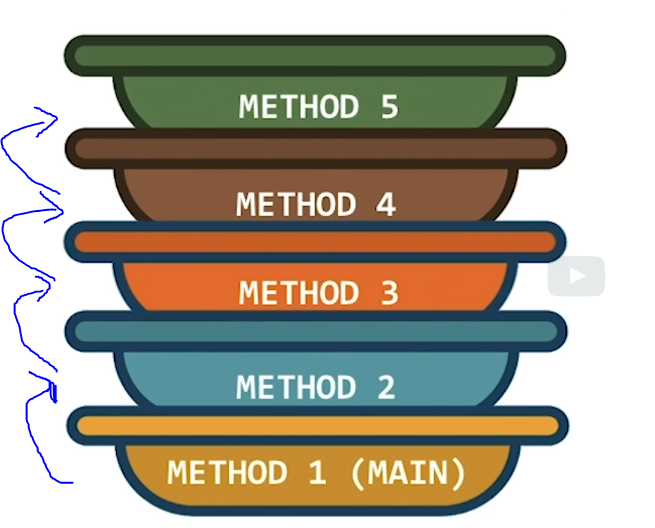

2. As methods complete, each record that each method pushed to the stack is removed (popped off) the stack. Main method's record being pushed off the stack signifies the end of a program.
- When the called method returns (popped off), the JVM retrieves the saved state of the next layer calling method and continues with the next instruction. 
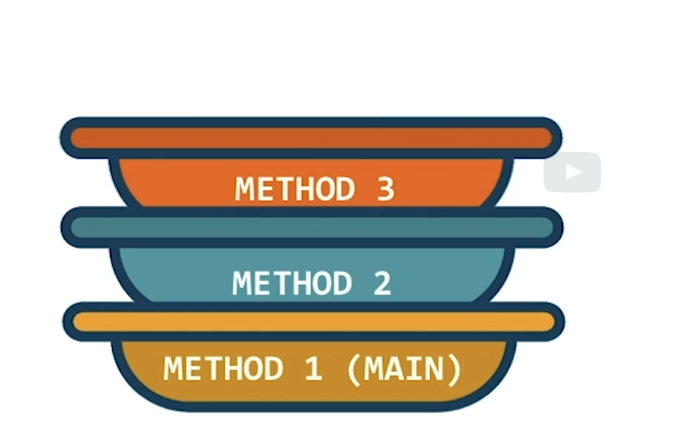
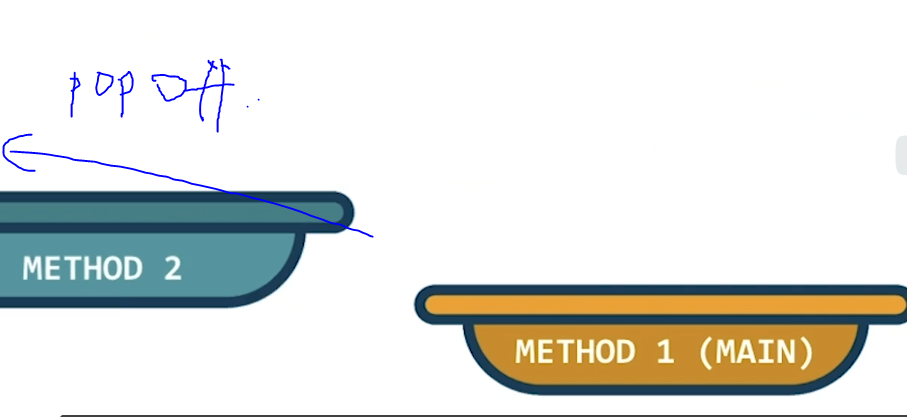

> Note that the call stack is not something we can directly access in our programs. It is managed internally.

## 2. Exception vs. Error in Java Throwable Hierarchy

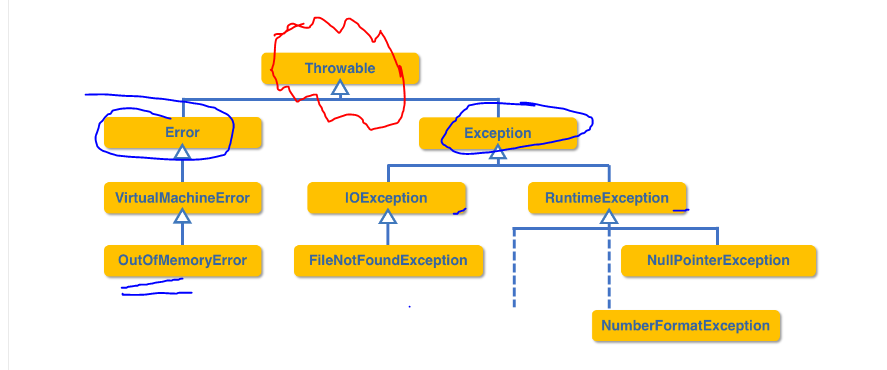

- A subclass of the Error class represents a kind of error that generally can’t be recovered from -- like when the JVM has no more memory to continue executing your program. (OOS from current class)
- Exceptions, on the other hand, are the kind of errors that offer more flexibility in how they are handled. 

## 3. Handling Exceptions

### 3.1. Method - Try and Catch

S1: You first wrap the statements that may throw an exception with a "try block".

S2: To actually catch a thrown exception, the try block must be immediately followed by a "catch block". The statements in the catch block determine what to do in response to the exception.  As you can see below, a catch block declares a parameter that represents that exception's type: 

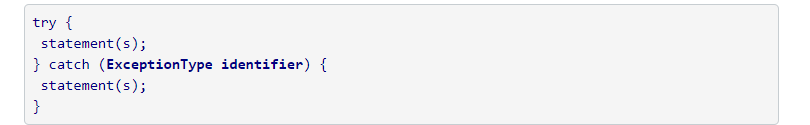

A try block can throw more than one kind of exceptions, so we can use multiple catch block to catch them

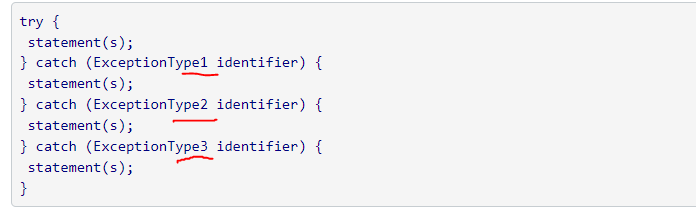

**VIP NOTES 1**
- Remember that a variable scope is within its nearest set of curly braces. This means any variable declared within the try block cannot be accessed in the rest of the code outside of that try block.
- Example: the below code will throw a compiler error (not runtime error exception), because "fahrenheit" variable declared inside of the try block cannot be accessed by the outside code line: double celsius = (xxx)\*(fahrenheit - 32)
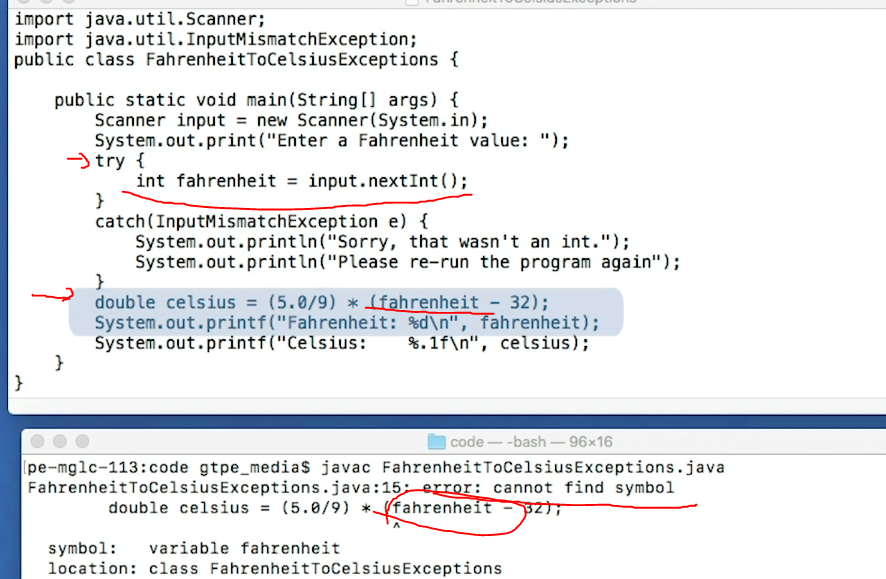

- Golden Rule:
> any code that's dependent on the set of statements
that may throw an exception should be in the same try block as those statements.

- Correction from above code: 
    - now let's put the code line that is relevant to "fahrenheit" variable within one try block
    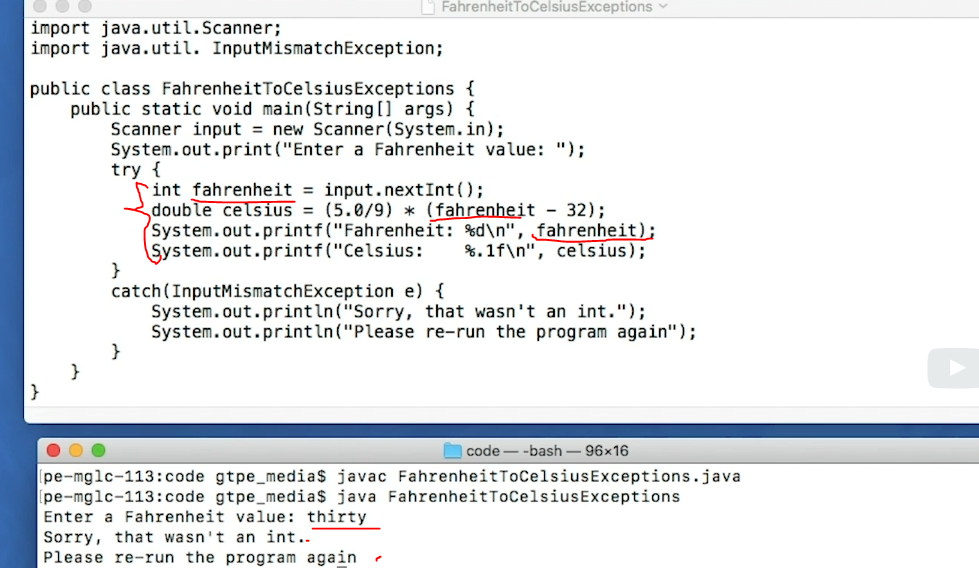

### 3.2. Exception Controlled Loops:

Here's a version of our program now with the while statement that repetitively prompts for a temperature until the user input doesn't generate an exception.

We'll call such a loop an **exception controlled loop** because the number of iterations it performs is controlled by the presence of an exception

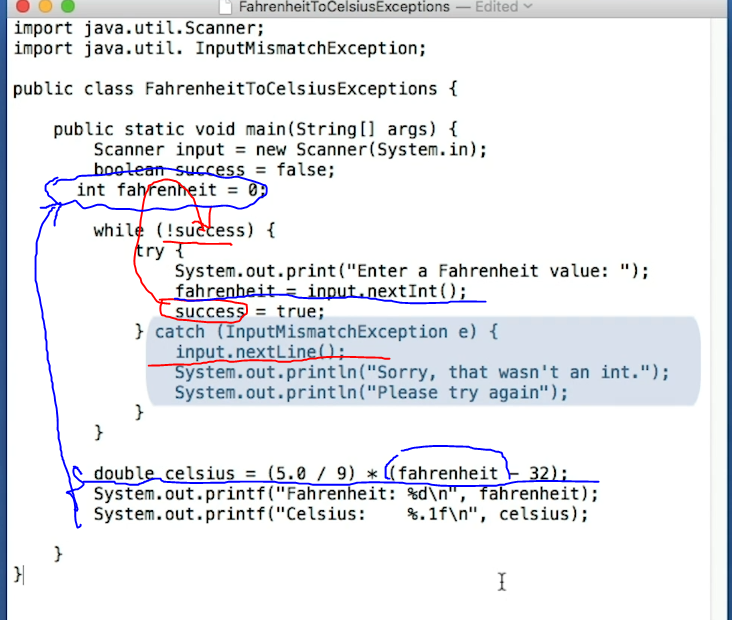

In above example:
1. Used while loop with success flag to loop until a fahrenheit value that does not throw an exception in try block
2. In catch block: used "input.nextLine()" to clean up the new line character left on the stream by the previous user input to Scanner().
3. Note here we used another method to write the try block: 
    - we declared the "fahrenheit" variable first in the main(), and then used it in try block and outside of the try block. In this case, there will not be a compiler error as when we declare "fahrenheit" variable inside the try block.
    - the reason is that: The reason why is that with the loop, the program makes sure that there's a legal Fahrenheit value before the "double celsius = xxx" are attempted. The loop won't stop until there's a legal Farenheit value.

### 3.3. Why using Exception?

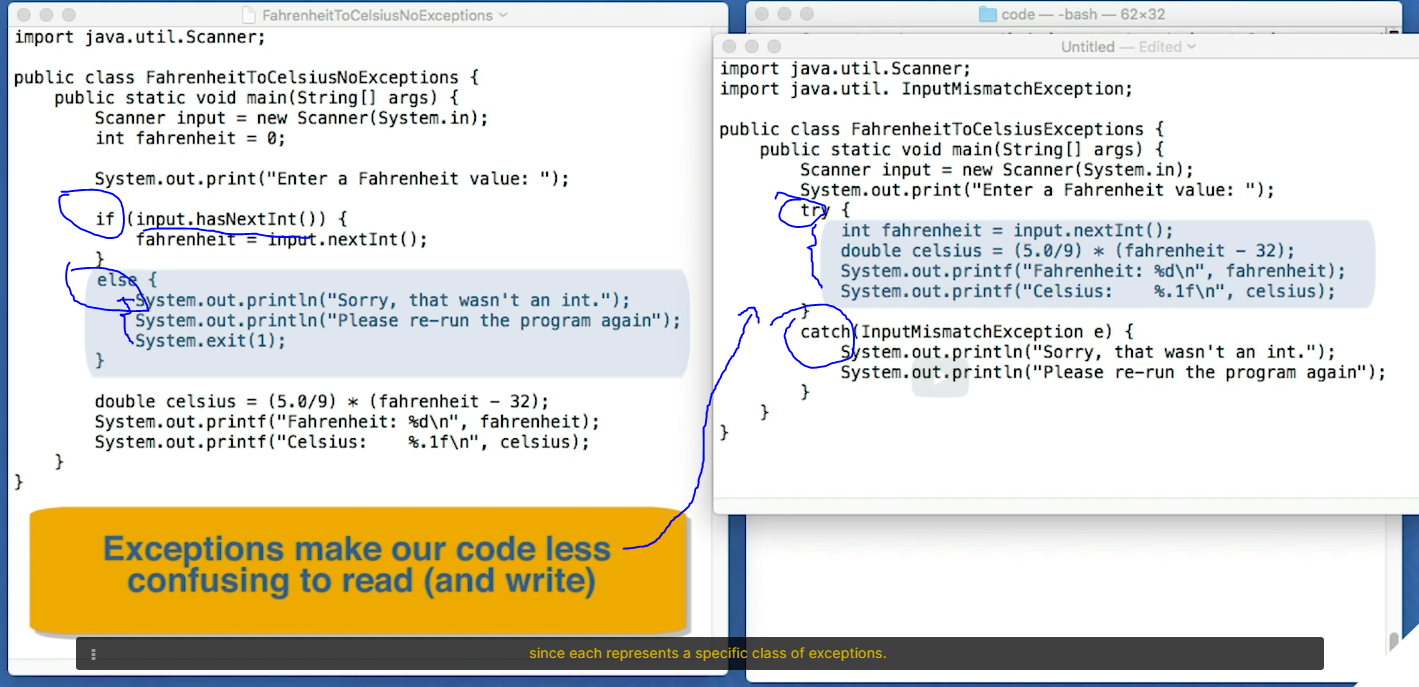

- On the left is using if else to catch if the input is integer, if not then exit the program.
- On the right is using exception to catch if the input is integer, if not then exit the program.
- The reason we prefer the RHS method (using exception) is because using exception can ensure there is no interruption in the statements that define the core logic of the program. This is especially obvious in the large program.

### 3.4. Handling Multiple Exceptions

#### 3.4.1. Multiple catch blocks

**Syntax Error 1:** (compiler error)
- Java does not allow general Exception being put under catch block before specific Exception.
- For example below: 
    - first catch block is to catch generic Exception, which is the superclass of all exceptions
    - second and third catch blocks are to catch specific Exceptions, e.g. InputMismatchException, ArithmeticException.
    - In this case, compiler will throw an error saying those specific exceptions are already been caught in the generic exception above, since the generic exception must be executed first if there is any kind of exception.
- Reason:
    - Remember once you hit exception in any of the code line (e.g. 1st line) in the try block, you will jump to catch block to check exception, after any catch block is executed, it will exit the try-catch block and never return to try block to check the remaining lines of code within in the try block (e.g. 2nd line and below)
    - Therefore, if we put the generic Exception in catch block before any of other specific Exception catch blocks, once any exception is thrown in try block, it will first jump to the generic Exception catch block because it is the first catch block.
    - After executed, it will never return to try block to check the remaining code in the try block, therefore, the 2nd and 3rd catch block will never be used. And Java compiler has this built-in mechanism to check such syntax and prevent this style of coding from being compiled.
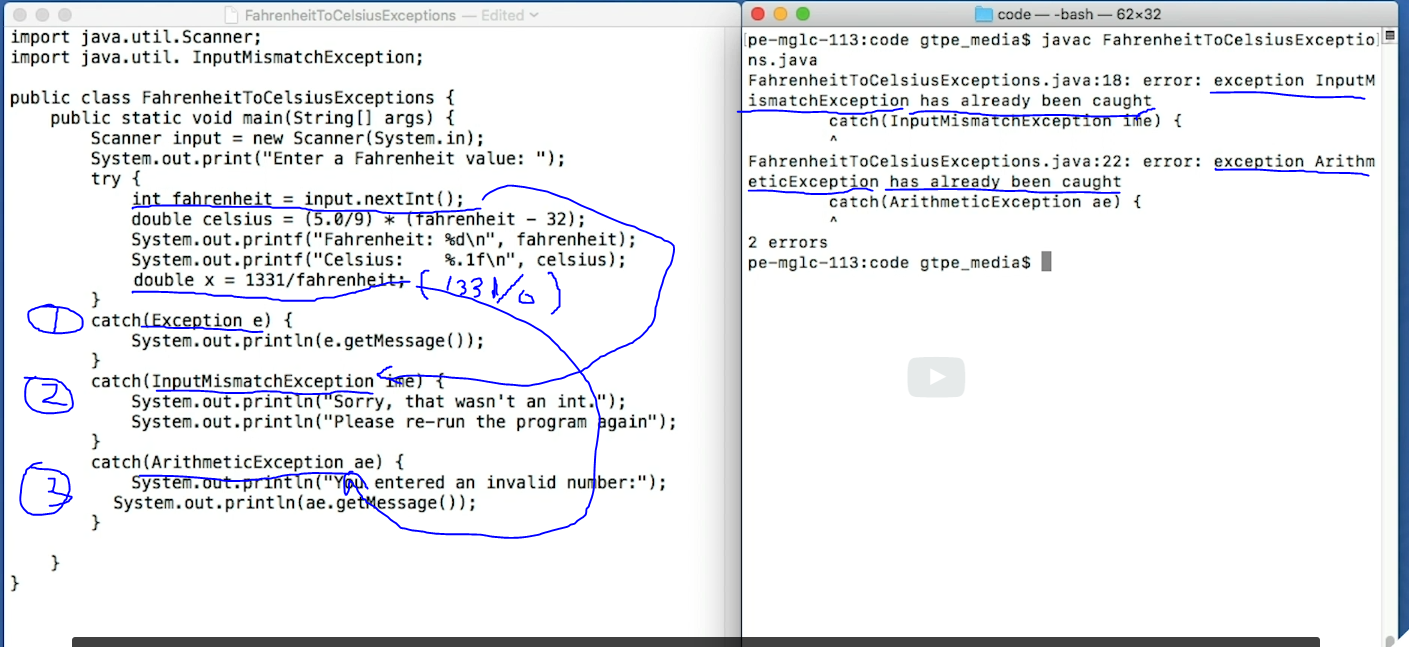


**Correct way to format multiple catch blocks**

- correct way is to put the generic Exception catch block after all specific Exception

- If you want to see exception message, simply use .getMessage() method.

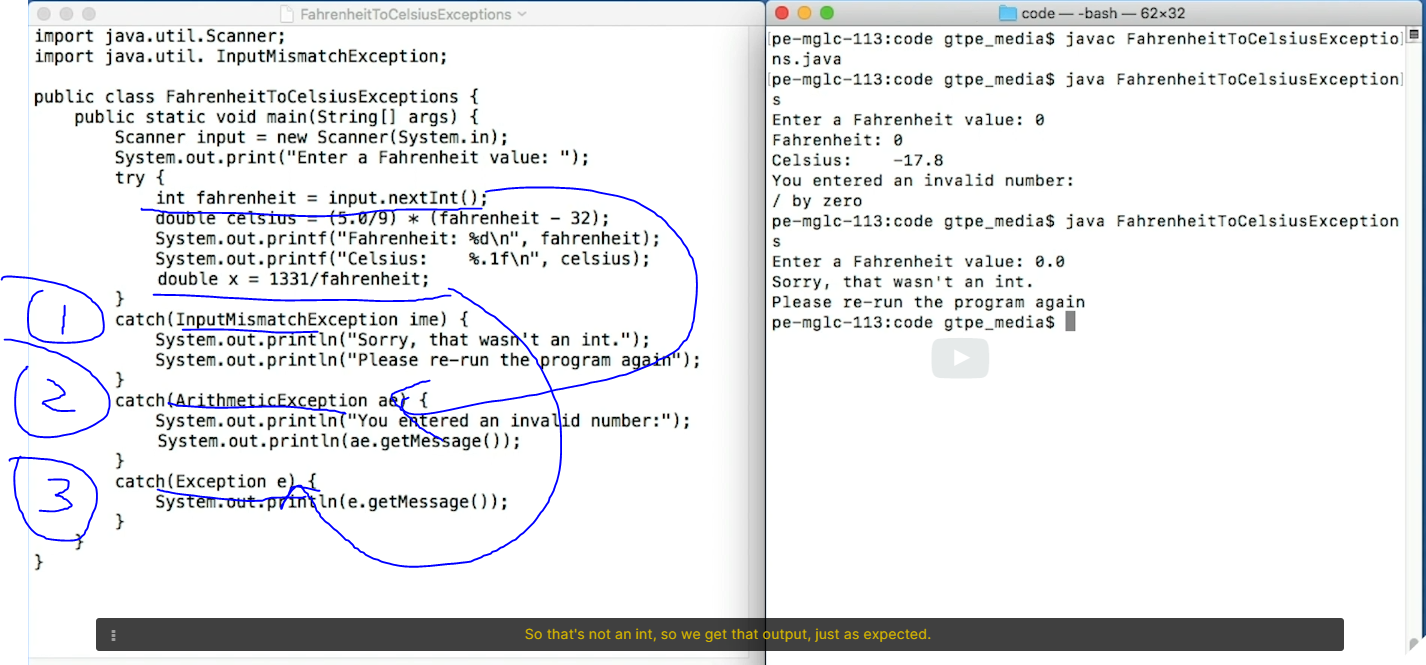

**VIP Notes**

- If the input is 0.0, theoretically it satisfies both specific Exceptions, i.e. input is not integer (1st catch block) and divide by 0 (2nd catch block)

- But because of this rule: After catch block is executed, it will never return to try block to check the remaining code in the try block

- Therefore, in the example above, input.nextInt() in try block will throw exception and match the 1st catch block, after 1st catch block is executed, it will never return to try block to examine the remaining code, so it will never catch the divide by 0 exception in "double x = 1331/fahrenheit" line of code. That's why you only saw one exception message, instead of two!!!!!!

#### 3.4.2. Combine Multiple Exceptions into one catch block

simply use "|" operator ("Bitwise OR" operator) 

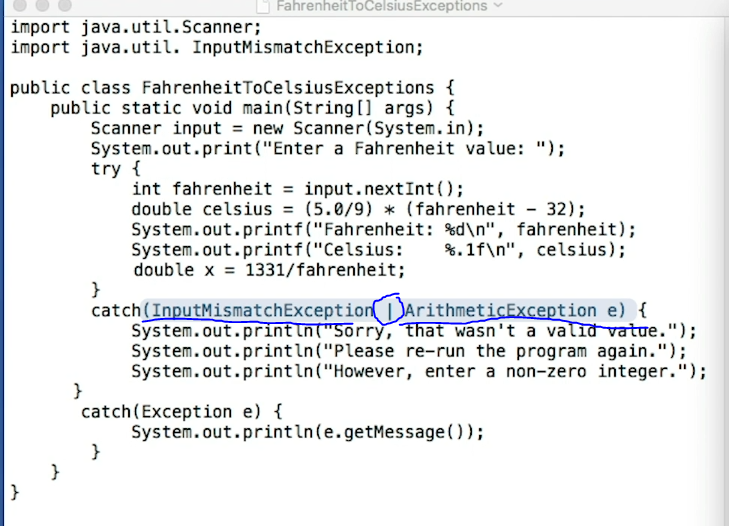

### 3.5. Finally block

Definition:
- "Finally block" contains statements that must execute regardless of whether a try block throws an exception or not.

Why do we need it?
- Remember in section 3.2. exception controlled loops, we used "input.nextLine()" in each catch block to cleanup newline character (\n) at the end of each line of system input, so that Scanner pointer can point to next line in the system input.
- Same happens in the example below, except we have another "input.nextLine()" used after the while loop, to clean up newline character for a new variable "day". (1st screenshot below)
    - Once a **legal** "fahrenheit" value is entered from system in (i.e. int value), the try block will successfully complete and skip the catch block as well as ending the while loop. So for the last while loop iteration, "input.nextLine()" in catch block is not executed for the last line of system input, that left the Scanner pointer points to the position before "/n" (newline character)
    - This is why we need another input.nextLine() right after the while loop before the new variable "day" that needs system input from Scanner.
- However, we can use "Finally" block so that "input.nextLine()" only needs to be used once. (2nd screenshot below)
    - we can see in the finally block example below, we removed the input.nextLine() from catch block and after while loop, and put it under "finally" block

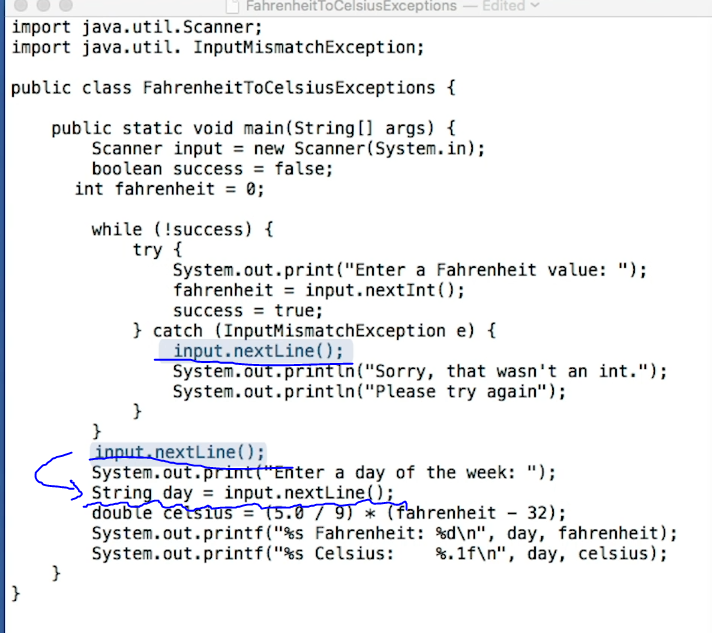

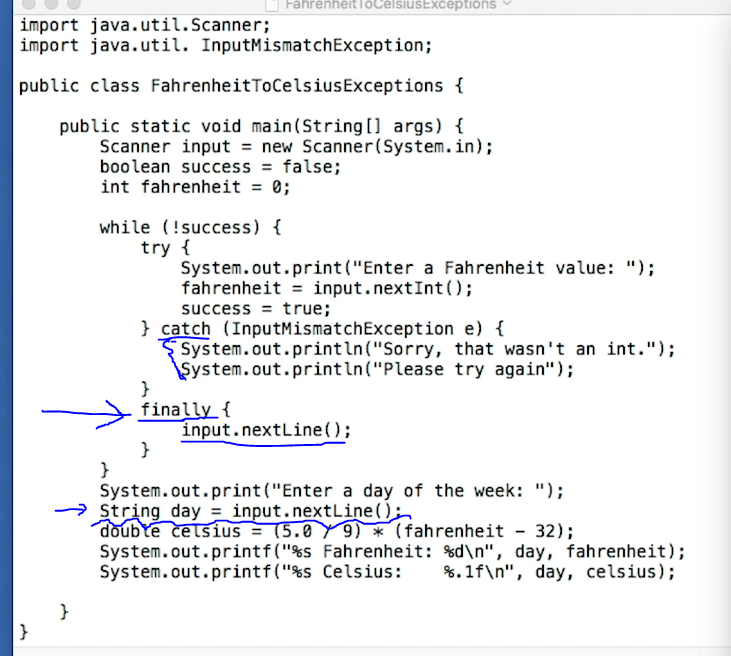

Other applications for "finally" block:
- Opening a connection to a database can require several steps that must be **undone**, no matter if the connection was successful or not. Those steps can be put under the finally block

## 4. File I/O (Read file using Scanner+write output file using PrintWriter) and FileNotFoundException

### 4.1. Read file using Scanner and FileNotFoundException

- Scanner() can not only read keyboard input (system.in), but also read a file (e.g. a txt file).
- To read a file, we need the java.io package
    - java.io.File is a File class, with constructor to accept a path name of a file. (i.e. code line: File fileIn = new File(inputFileName), in the screenshot below. Where inputFileName comes from the user input when execute this java file) -> [See Blue highlights below]
    - java.io.FileNotFoundException will let Scanner() to throw a FileNotFoundException when the file does not exist when passing to Scanner(). (i.e. code line: fileScan = new Scanner(fileIn), in the screenshot below.) -> [See RED highlights below]
        > note: this exception was thrown in Scanner(), not File() constructor!!!!!!

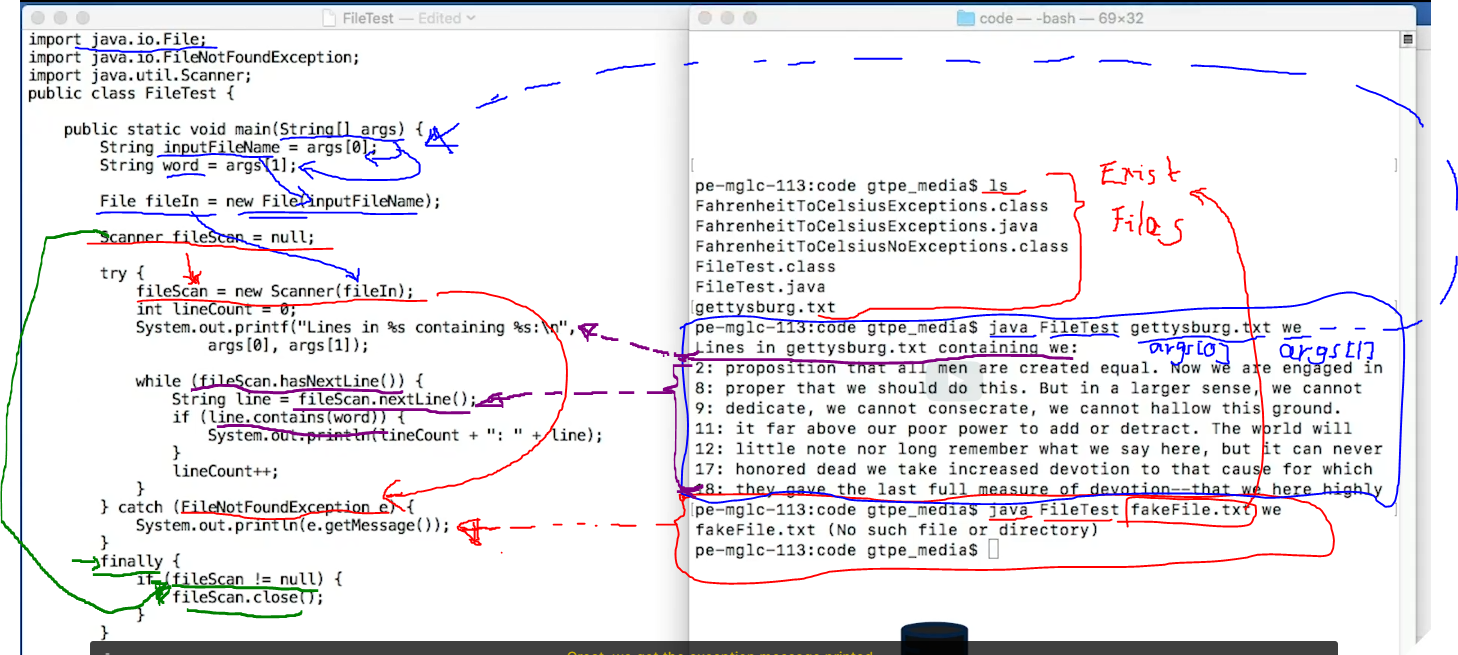

- In the Purple highlights above, Scanner scans the file line by line using .nextLine() method, and examine if the keyword defined in "word" variable exists in each line, if so, then print to the terminal.
- In the Green highlights above, before we exit the program, we need to ensure the file is closed by Scanner, and we can do it in the "finally block", i.e. fileScan.close(). However, if fileScan == Null, the .close() function will encounter error, therefore, we need to make sure fileScan != Null before execute .close()

### 4.2. Write output file using PrintWriter

- In the example above in Section 4.1., we simply output the print line into the terminal using system.out.println(xxx) (under while loop)
- In this section, we replaced "system.out" with a PrintWriter object (i.e. "filePrint" in example below), to write the output to a file instead of to the terminal as in section 4.1.
    - the red highlights below is the code related to "PrintWriter" class
    - PrintWriter is a class in java.io
    - Note that we replaced the "system.out" with "filePrint" under the "try block" compared to example in Section 4.1.
    - Same as Scanner object (when reading the file), PrintWriter object (for writing file) also needs to be closed before exiting the program. (see last red highlights under "finally block")
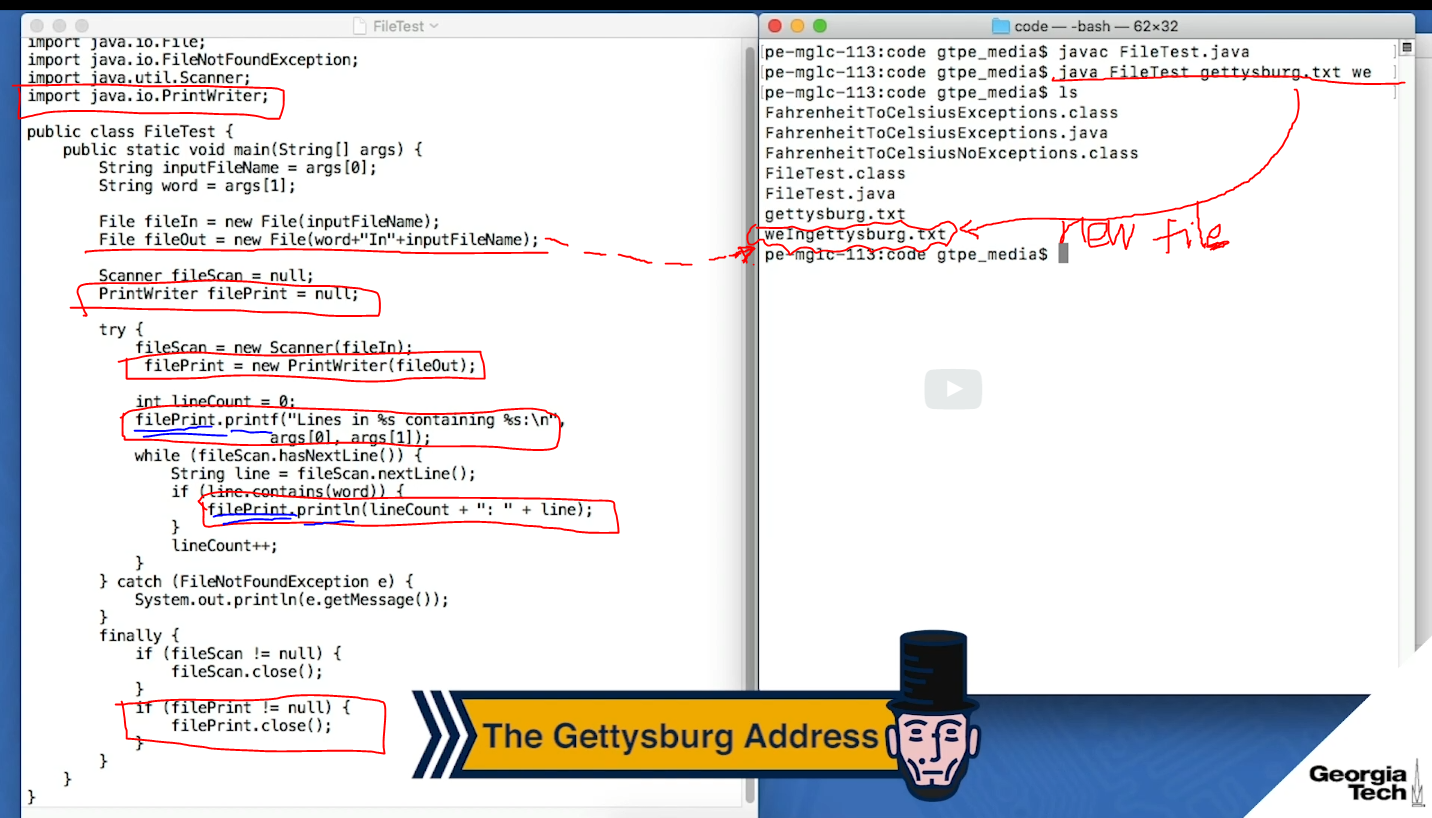
> If output file exists on the disk, PrintWriter will overwrite it by clearing out the existing data and start with an empty new file with the same filename and pathway.

### 4.3. Specific feature about "FileNotFoundException"

- Unlike other exceptions we saw (e.g. Array Out of Bounds exceptions, Arithmetic exceptions, and Input Mismatch exceptions), for "FileNotFoundException", we can't get away with just writing code that may throw a FileNotFound exception and have it compile without doing something specific for that particular exception. (Example below)
    - For other exceptions, we can compile like this, and remember any error will be thrown at runtime stage.
    - For FileNotFoundException, Java does not allow us to code this this, and will throw error at compiler stage.

> Reason: Because "FileNotFoundException" is under "IOException" superclass, but other exceptions we saw before are under "RuntimeException" superclass (see graph in section 2) [Details refers to next section: section 5]

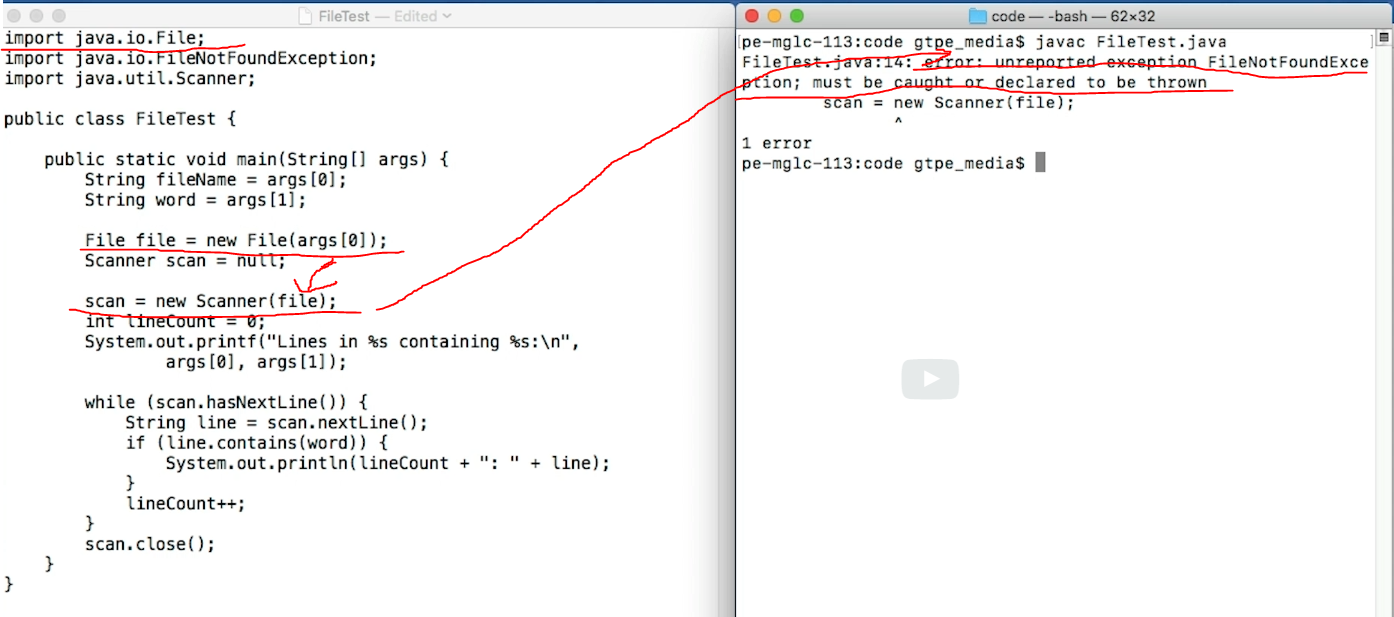
> Note: the error message shown in the terminal above is a "Compiler Error" not "Runtime Error or Exception"

- There are two ways to solve the compiler error above:
    - Method 1: Using try and catch block to catch the exception (see catch block in section 4.1 and 4.2)
    - Method 2: Declare the exception in method header using keyword "throws" (see below)
    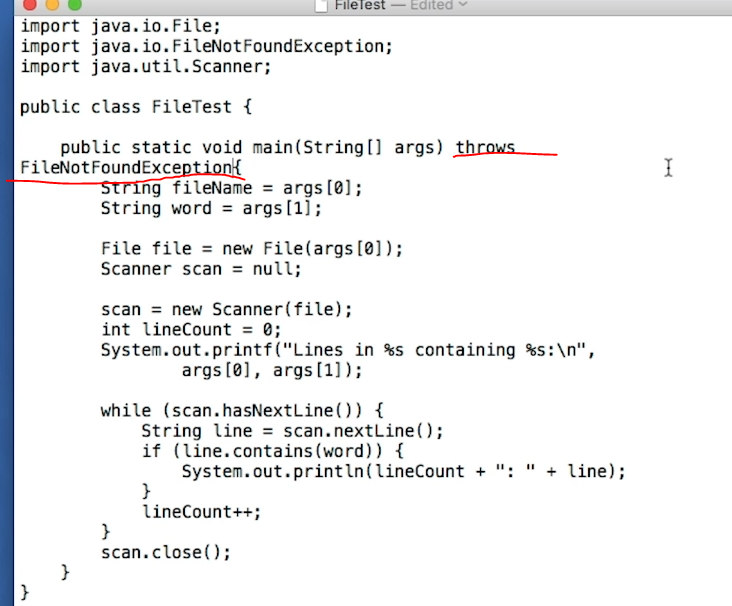

## 5. Checked vs. Unchecked Exceptions

- Red highlights are **Checked Exceptions**, where we need to specify (with a throws clause) or catch just like in the code above in section 4, otherwise, it will have compiler error.
> IOException and its subclass of FileNotFoundException is one example.  Though others aren’t shown in the diagram, there are many others.
- Blue highlights (RuntimeException) are **Unchecked Exceptions**, where we don't need to specify or catch in the code and there will not be compiler error because of this.
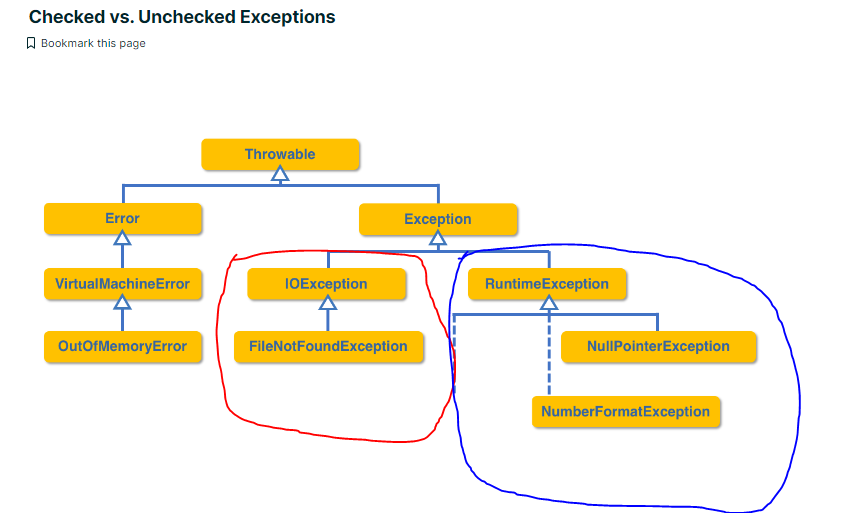


## 6. Self-Define an Exception subclass

- In this section, we self-define an exception which is a subclass of "ArithmeticException"
- Blue highlights is the class name of the new exception we defined -- "DivideByZeroException"
- Red highlights is the constructor of that class, where super is used to refer to the constructor in the "ArithmeticException" superclass
    - How to use super() - please refer to Module_5_L12_Inheritance [or see the 3rd screenshot below]
    - so for DivideByZeroException constructor, we replaced the "string s" in the "ArithmeticException" 's parameter (1st screenshot) with our self-defined string "Divide by zero." (2nd screenshot))
    - This string is the value that’s returned when the .getMessage() method is invoked on an instance of the exception.
    - .getMessage() method is one of the method in "ArithmeticException" class that takes the "string s" variable, but because "DivideByZeroException" is child class of it, it can also invoke such method.
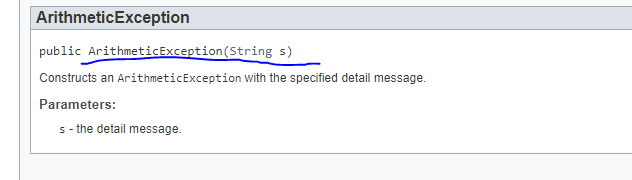
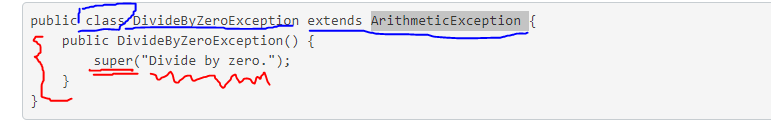
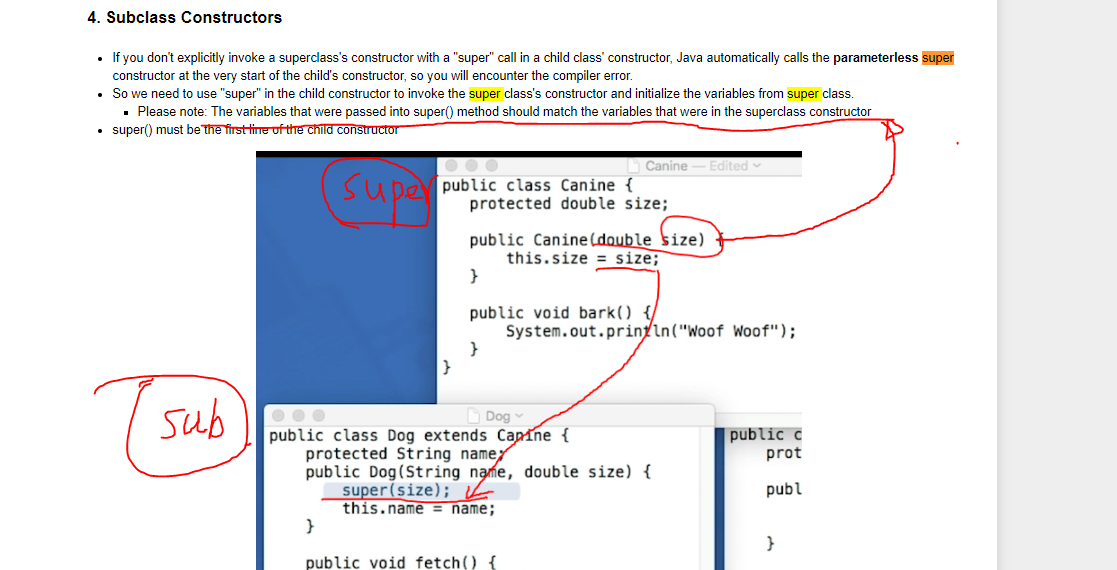

- In the main code, we need to do two things to use the self-defined Exception class:
    - 1. Instantiate and thrown the exception object
        - Using "throw new xxx" in code line below
    - 2. Catch the exception
        - Using catch block and invoke .getMessage() method to print customized string we defined above.
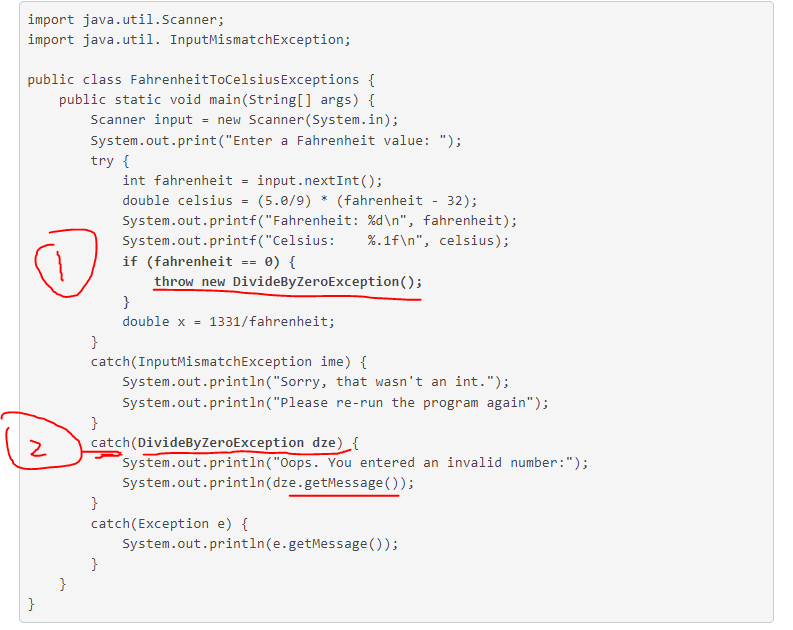

## 7. File I/O: Delimited Files (in this lesson: CSV (Delimiter = ","))

### 7.1. write CSV file using PrintWriter 

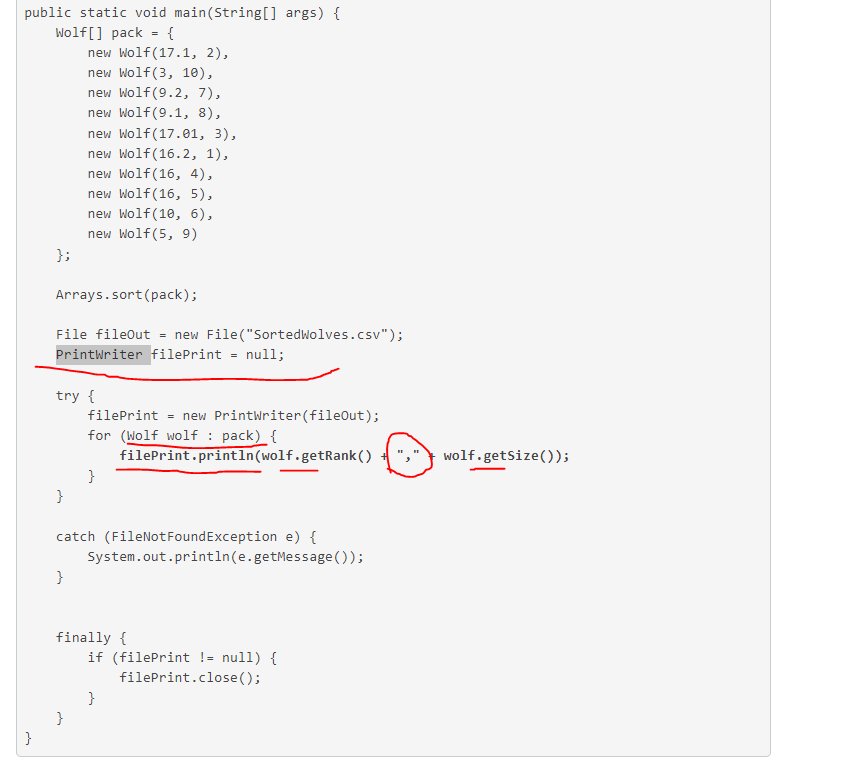
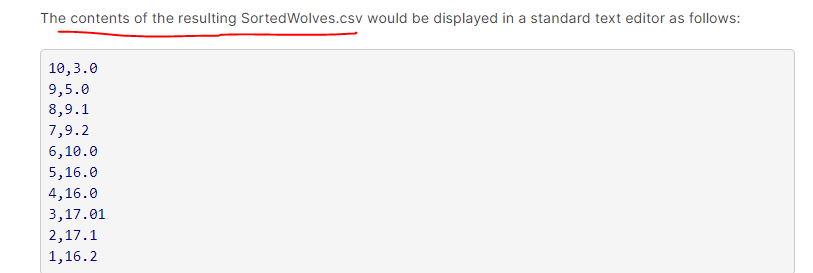

### 7.2. Parsing delimited string using .Split(\<delimiter>)

- " " as delimiter
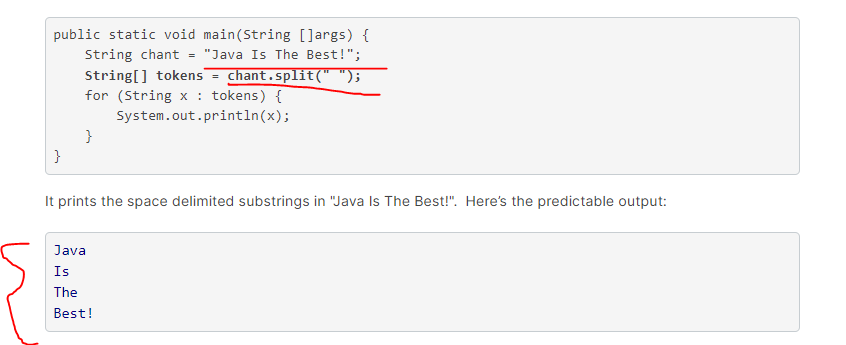

- "," as delimiter and using Scanner() to read the CSV file
    - note: the csv file to read is same as above output in section 7.1, each line represents two numerical values separated by comma, e.g. "10,3.0"
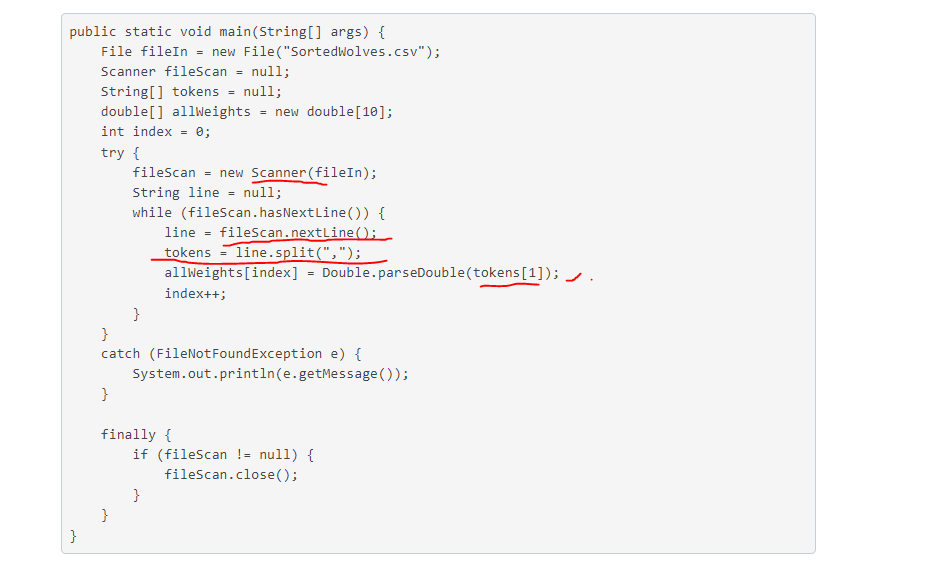

- Regex as delimiter
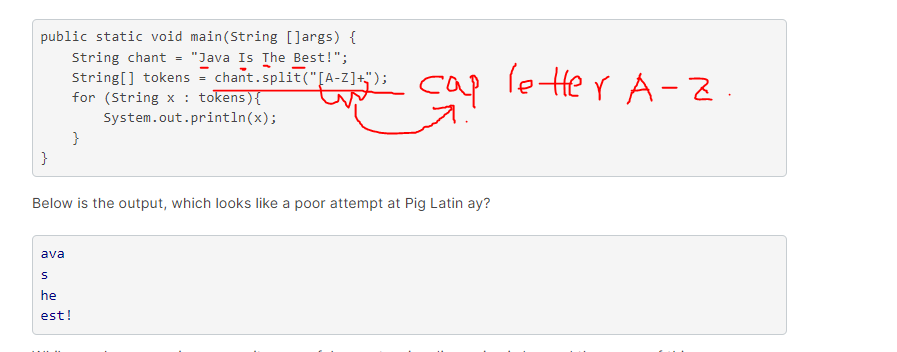

### 7.3. Parsing delimited string using Scanner -> .useDelimiter(\<delimiter>) method

- Scanner class can not only process keyboard input (system.in) and file input like we saw previously, it can also process String as the data stream. Here is the constructor
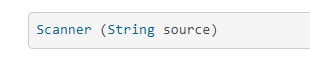

- When using .useDelimiter(","), Scanner replaces its default " " delimiter with "," when processing data stream

- Therefore, all next-related method (except for next line) will move the pointer to after each "," in the data stream
    - In the screenshot below, "line" variable represents each line in the output in section 7.1, i.e. two numerical values separated by comma, e.g. "10,3.0"
    - after using delimiter = ",", the data stream of "10,3.0" in line object will be separated to "10" and "3.0"
    - then nextInt() will process "10" and nextDouble() will process "3.0"
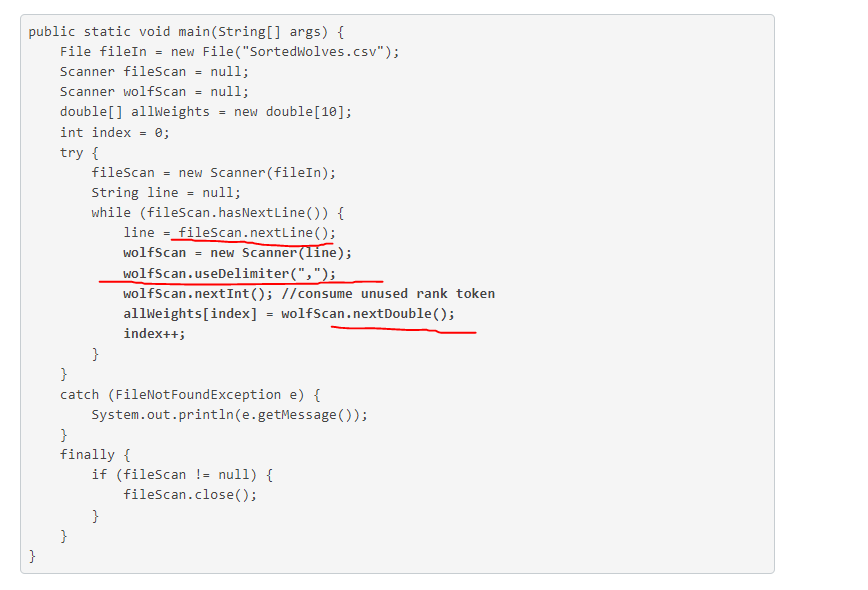